In [3]:
import sklearn
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

In [80]:
def generate_data(miu, sigma, num):
    """
    生成测试数据
    :param miu: 期望
    :param sigma: 标准差
    :param num: 数据个数
    :return:
    """
    points_x = np.random.randn(num) * sigma + miu
    points_y = np.random.randn(num) * sigma + miu
    after = np.vstack((points_x, points_y))
    return after.transpose()

def draw(x, y):
    plt.scatter(x, y, edgecolors='red')
    plt.show()

def draw_pred(x, y, classification_id, **kwargs):
    colors = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'pink']
    for i in range(len(classification_id)):
        plt.scatter(x[i],  y[i], c=colors[classification_id[i]], s=50)
    plt.show()



def cg_axis_bias(array: np.ndarray, bias: int, axis: str):
    """
    聚合点整体位移
    :param bias:
    :param array:
    :param axis:
    :return:
    """
    if axis == 'x':
        array[:, 0] += bias
    if axis == 'y':
        array[:, 1] += bias
    else:
        raise TypeError("parameter <axis> must be `x` or `y`!")
    return array

In [90]:
class1 = generate_data(0, 2, 10)
class2 = generate_data(10, 2, 30)
class3 = generate_data(5, 2, 20)
class3 = cg_axis_bias(class3, 20, 'y')
combine = np.concatenate([class1, class2, class3], axis=0)
combine

array([[ 3.58369057, -3.49460867],
       [-1.91320361,  0.15464175],
       [ 2.12207466,  1.90791214],
       [ 2.82886286, -0.49564778],
       [-1.9534931 , -0.76719203],
       [ 2.41943943,  2.71256036],
       [-2.72716352, -0.44966252],
       [-1.03747965, -1.6519132 ],
       [ 2.25521162,  0.87481276],
       [-4.00736259, -1.81880938],
       [ 9.83972581,  9.25049977],
       [10.99694894, 11.29308742],
       [ 9.40286912,  8.89731226],
       [ 9.99395414, 12.11417353],
       [ 9.25136078,  6.49218538],
       [13.40470208,  8.52659233],
       [ 9.21987529,  6.77286016],
       [10.96004461, 12.43453495],
       [ 9.15215766,  7.43757413],
       [12.6526819 , 11.554479  ],
       [ 5.1745935 ,  4.28784502],
       [10.36149604, 12.2473306 ],
       [11.62775107,  7.28098212],
       [11.31284793,  9.24251298],
       [ 8.03567586,  8.5512498 ],
       [ 9.29302231,  9.88010148],
       [10.63827578,  8.95554114],
       [10.53512387, 10.37111219],
       [11.97092538,

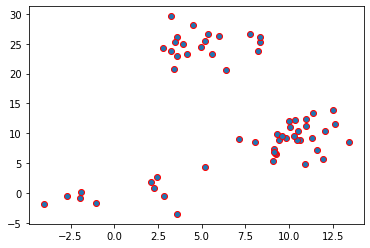

In [91]:
# k_means = KMeans(2).fit(combine)
x = combine[:, 0]
y = combine[:, 1]
draw(x, y)

In [92]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, verbose=True).fit(X=combine)

Initialization complete
Iteration 0, inertia 1134.4082948837972
Iteration 1, inertia 515.3010880624208
Iteration 2, inertia 509.4075874850562
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1093.96375004118
Iteration 1, inertia 509.4075874850562
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1021.3003432717156
Iteration 1, inertia 515.3010880624208
Iteration 2, inertia 509.4075874850562
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 678.6798957849264
Iteration 1, inertia 509.4075874850562
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 738.6213325304475
Iteration 1, inertia 509.4075874850562
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1392.581443368946
Iteration 1, inertia 515.3010880624208
Iteration 2, inertia 509.4075874850562
Converged at iteration 2: strict converg

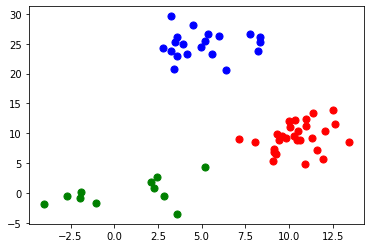

In [93]:
classes = kmeans.predict(X=combine)
draw_pred(x, y, classes)